# Исследование объявлений о продаже квартир

# Описание проекта
В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Наша задача и цель:** выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

# Описание данных
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — общая площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении
    
# Используемые библиотеки

python, pandas, matplotlib, исследовательский анализ данных, визуализация данных, предобработка данных

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

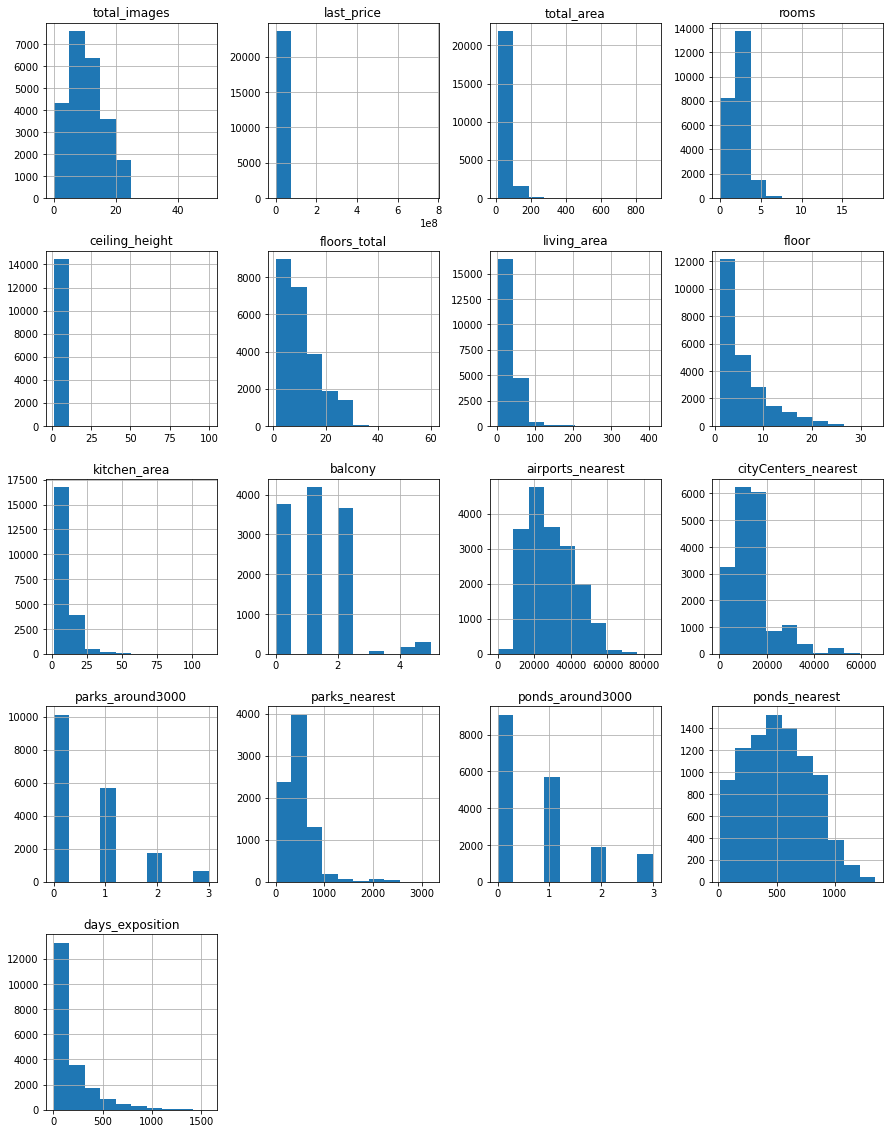

In [5]:
df.hist(figsize=(15,20))
plt.show()

**Из данных выше, становится понятно, что для некоторых столбцов установлен некоретный тип данных, который следует в дальнейшем исправить**

**Также мы выяснили, что есть пропущенные значения в данных в определенных столбцах**

**Из текущих гистограмм становится нагляднее и понятнее, какова количественная величина определенных категорий, например:**

*1) Сразу видим, что наибольшее число водоемов в радиусе 3 киломмметров приходится на значение '0'.*

*2) Также понимаем, что наибольшее число парков в радиусе 3 киломмметров приходится на значение '0'.*

**Но пока данные не будут коретно обработаны, окончательные выводы по гистограммам делать не следует**

### Предобработка данных

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
columns_to_replace = ['balcony', 'parks_around3000', 'ponds_around3000']
for x in columns_to_replace:
    df[x] = df[x].fillna(0)

*Исходя из ранее просмотренных первых 5 записей исходного датафрейма, можно было заметить то, что количество дней и общее количество этажей приведенны во float64, в то время как их корретная запись должна быть целочисленной, и потому, чтобы можно было производить замену, следует избавится от пропусков, - можно заменить медианным значением, ибо нам важны эти столбцы для анализа в дальнейшем*

In [8]:
v1 = df['floors_total'].median()
df['floors_total'] = df['floors_total'].fillna(v1)

v2 = df['days_exposition'].median()
df['days_exposition'] = df['days_exposition'].fillna(v2)

In [9]:
print('Проверка NaN в столбцах, в которых была замена на 0:')
print(df['balcony'].isna().sum())
print(df['parks_around3000'].isna().sum())
print(df['ponds_around3000'].isna().sum())
print(df['days_exposition'].isna().sum())
print('Проверка NaN в столбцах, в которых была замена на медианное значение:')
print(df['floors_total'].isna().sum())
print(df['days_exposition'].isna().sum())

Проверка NaN в столбцах, в которых была замена на 0:
0
0
0
0
Проверка NaN в столбцах, в которых была замена на медианное значение:
0
0


**Выводы по пропущенным данным:**

*Были обнаружены пропущенные значения в данных, и причиной этому может быть некоректное считывание данных при получение их на основе картографических данных.*

*Также второй возможной причиной может быть человеческий фактор, так как пользователь мог намеренно ничего не указывать в определенных данных требуемые значения по какой-либо причине.*

*Мы обнаружили пропущенные значения, которые явно нельзя было заменить, например, для булевых значений, и те записи, к которым можно было применить замену, мы решили заменить пропуски на 0 и на медианну в определенных столбцах.*

In [10]:
replace_format = ['parks_around3000', 'ponds_around3000', 'days_exposition', 'balcony', 'floors_total']

for x in replace_format:
    df[x] = df[x].astype(int)

*Была произведенна замена типа переменных в столбцах в связи с тем, что данные напримере `balcony` не могут иметь 2.5 балконов, как и общее число этажей `floors_total` не может быть дробной записью и предополагать половину балкона: 16.0*

*Мы могли заменить записи в стоблцах `airports_nearest`, `cityCenters_nearest`, так как там нет после запятой значений, но поскольку мы храним в них расстояние, которое явно может быть не целлым, то следует отставить в таком изначальном виде*

In [11]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


**АНОМАЛИИ**

In [12]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [13]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

*Отсюда понимаем, что выбросами можно считать все значения, кроме 1, 2 и 3, поскольку у них процентное соотношение равно  33.96%, 33.5% и 24.53%*

In [14]:
df = df.drop(index=df[(df['rooms'] > 3) | (df['rooms'] == 0)].index)

In [15]:
df['rooms'].unique()

array([3, 1, 2])

In [16]:
df['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   9.2 ,  11.7 ,
        13.4 ,   6.3 ,  11.6 ,   8.8 ,  10.  ,   7.5 ,   7.  ,   9.5 ,
        50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,  16.  ,   5.3 ,
        11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,   7.3 ,  11.95,
        10.2 ,   6.4 ,   5.5 ,   8.4 ,  13.  ,  23.6 ,  10.8 ,  18.3 ,
         5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  17.  ,  26.85,  15.4 ,
         7.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,   7.9 ,  10.3 ,
         9.8 ,  17.5 ,  14.7 ,  20.91,  10.6 ,  10.9 ,   9.7 ,   7.7 ,
        12.5 ,  11.4 ,   8.6 ,  11.24,  15.7 ,  13.29,  14.  ,  12.9 ,
        16.5 ,   9.36,  21.5 ,  35.  ,  10.5 ,   8.7 ,  19.3 ,  49.2 ,
        11.52,   8.9 ,   9.6 ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
        18.4 ,   7.4 ,  14.1 ,  11.3 ,   9.4 ,  13.1 ,  10.19,   7.06,
      

In [17]:
df['kitchen_area'] = df['kitchen_area'].where(df['kitchen_area'] < 25, df['kitchen_area'] / 10)

In [18]:
df['kitchen_area'].unique()

array([ 2.5  , 11.   ,  8.3  ,    nan,  4.1  ,  9.1  , 14.4  , 18.9  ,
        8.81 ,  6.5  ,  8.5  ,  6.   ,  9.   ,  5.2  ,  8.   ,  7.6  ,
        5.6  , 12.   ,  5.7  ,  6.1  , 19.6  , 15.   ,  9.2  , 11.7  ,
       13.4  ,  6.3  , 11.6  ,  8.8  , 10.   ,  7.5  ,  7.   ,  9.5  ,
        5.   , 15.5  , 10.7  , 11.1  , 20.   , 11.9  , 16.   ,  5.3  ,
       11.5  ,  7.2  ,  6.2  , 10.4  ,  7.1  ,  4.9  ,  7.3  , 11.95 ,
       10.2  ,  6.4  ,  5.5  ,  8.4  , 13.   , 23.6  , 10.8  , 18.3  ,
        8.2  , 24.   , 23.8  ,  6.6  , 17.   ,  2.685, 15.4  ,  7.8  ,
        5.4  , 12.72 , 12.2  , 19.   , 12.4  ,  7.9  , 10.3  ,  9.8  ,
       17.5  , 14.7  , 20.91 , 10.6  , 10.9  ,  9.7  ,  7.7  , 12.5  ,
       11.4  ,  8.6  , 11.24 , 15.7  , 13.29 , 14.   , 12.9  , 16.5  ,
        9.36 , 21.5  ,  3.5  , 10.5  ,  8.7  , 19.3  ,  4.92 , 11.52 ,
        8.9  ,  9.6  , 14.2  ,  8.1  , 10.44 ,  4.5  , 16.3  , 18.4  ,
        7.4  , 14.1  , 11.3  ,  9.4  , 13.1  , 10.19 ,  7.06 , 11.2  ,
      

In [19]:
df = df.drop(index=df[df['kitchen_area'] > 25].index)
df = df.drop(index=df[df['kitchen_area'] < 5].index)

In [20]:
df['kitchen_area'].unique()

array([11.  ,  8.3 ,   nan,  9.1 , 14.4 , 18.9 ,  8.81,  6.5 ,  8.5 ,
        6.  ,  9.  ,  5.2 ,  8.  ,  7.6 ,  5.6 , 12.  ,  5.7 ,  6.1 ,
       19.6 , 15.  ,  9.2 , 11.7 , 13.4 ,  6.3 , 11.6 ,  8.8 , 10.  ,
        7.5 ,  7.  ,  9.5 ,  5.  , 15.5 , 10.7 , 11.1 , 20.  , 11.9 ,
       16.  ,  5.3 , 11.5 ,  7.2 ,  6.2 , 10.4 ,  7.1 ,  7.3 , 11.95,
       10.2 ,  6.4 ,  5.5 ,  8.4 , 13.  , 23.6 , 10.8 , 18.3 ,  8.2 ,
       24.  , 23.8 ,  6.6 , 17.  , 15.4 ,  7.8 ,  5.4 , 12.72, 12.2 ,
       19.  , 12.4 ,  7.9 , 10.3 ,  9.8 , 17.5 , 14.7 , 20.91, 10.6 ,
       10.9 ,  9.7 ,  7.7 , 12.5 , 11.4 ,  8.6 , 11.24, 15.7 , 13.29,
       14.  , 12.9 , 16.5 ,  9.36, 21.5 , 10.5 ,  8.7 , 19.3 , 11.52,
        8.9 ,  9.6 , 14.2 ,  8.1 , 10.44, 16.3 , 18.4 ,  7.4 , 14.1 ,
       11.3 ,  9.4 , 13.1 , 10.19,  7.06, 11.2 , 22.  ,  5.1 , 18.7 ,
       17.6 ,  9.9 , 14.3 , 18.  , 23.  , 11.8 , 13.3 , 17.7 , 23.1 ,
       10.63, 11.33, 13.5 , 19.5 , 13.2 , 17.2 , 13.8 , 12.3 ,  9.3 ,
        5.8 , 12.88,

In [21]:
df['balcony'].unique()

array([2, 0, 1, 5, 4, 3])

In [22]:
df = df.drop(index=df[df['balcony'] > 2].index)

In [23]:
df['balcony'].unique()

array([2, 0, 1])

In [24]:
df['ceiling_height'].unique()

array([  nan,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.7 ,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.64,  2.57,  4.15,  4.  ,  2.73,  2.84,  2.34,  3.4 ,  3.06,
        2.72,  2.54,  2.51,  2.78,  2.76,  3.1 , 25.  ,  2.58,  3.7 ,
        2.52,  3.5 ,  2.87,  2.66,  2.59,  2.  ,  2.85,  3.3 ,  2.45,
        2.92,  3.8 ,  3.15,  3.55,  3.62,  3.12,  2.53,  2.96,  2.74,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.54,  2.83,  2.4 ,  3.38,
        3.01,  3.65,  2.71,  2.3 ,  2.48,  2.62,  2.82,  3.98,  2.63,
        3.83,  3.75,  2.88,  4.19,  3.35,  3.24,  4.8 ,  4.5 ,  4.2 ,
       32.  ,  3.08,  3.07,  3.37,  3.09,  8.  ,  3.16,  3.26,  3.34,
        2.81,  3.44,  4.37,  3.6 ,  3.95,  2.68,  3.46, 24.  ,  3.27,
        3.47,  3.53,  3.33, 27.  ,  3.63,  3.14,  3.13,  3.32,  3.52,
       26.  ,  1.2 ,  3.18,  8.3 ,  3.9 ,  2.93,  2.98,  3.36,  4.1 ,
        2.86,  3.17,  3.11,  3.67,  3.28,  3.04,  3.66,  3.84,  3.23,
        3.02,  3.21,

In [25]:
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] < 5, df['ceiling_height'] / 10)

In [26]:
df['ceiling_height'].unique()

array([ nan, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.7 , 2.6 , 2.9 , 2.8 , 2.55,
       3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.64, 2.57, 4.15, 4.  ,
       2.73, 2.84, 2.34, 3.4 , 3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 3.1 ,
       2.58, 3.7 , 2.52, 3.5 , 2.87, 2.66, 2.59, 2.  , 2.85, 3.3 , 2.45,
       2.92, 3.8 , 3.15, 3.55, 3.62, 3.12, 2.53, 2.96, 2.74, 0.5 , 2.79,
       2.95, 4.06, 2.94, 3.54, 2.83, 2.4 , 3.38, 3.01, 3.65, 2.71, 2.3 ,
       2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.75, 2.88, 4.19, 3.35, 3.24,
       4.8 , 4.5 , 4.2 , 3.08, 3.07, 3.37, 3.09, 0.8 , 3.16, 3.26, 3.34,
       2.81, 3.44, 4.37, 3.6 , 3.95, 2.68, 3.46, 3.27, 3.47, 3.53, 3.33,
       3.63, 3.14, 3.13, 3.32, 3.52, 1.2 , 3.18, 0.83, 3.9 , 2.93, 2.98,
       3.36, 4.1 , 2.86, 3.17, 3.11, 3.67, 3.28, 3.04, 3.66, 3.84, 3.23,
       3.02, 3.21, 3.78, 4.3 , 3.39, 2.69, 4.4 , 3.22, 3.03, 0.53, 3.56,
       3.42, 2.99, 2.46, 2.97, 1.4 , 4.14, 3.88, 1.75, 4.25, 2.25, 2.91,
       2.26, 2.89, 2.49, 3.48, 1.03, 2.47, 1.  , 3.

In [27]:
df = df.drop(index=df[df['ceiling_height'] < 2].index)

In [28]:
df['ceiling_height'].unique()

array([ nan, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.7 , 2.6 , 2.9 , 2.8 , 2.55,
       3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.64, 2.57, 4.15, 4.  ,
       2.73, 2.84, 2.34, 3.4 , 3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 3.1 ,
       2.58, 3.7 , 2.52, 3.5 , 2.87, 2.66, 2.59, 2.  , 2.85, 3.3 , 2.45,
       2.92, 3.8 , 3.15, 3.55, 3.62, 3.12, 2.53, 2.96, 2.74, 2.79, 2.95,
       4.06, 2.94, 3.54, 2.83, 2.4 , 3.38, 3.01, 3.65, 2.71, 2.3 , 2.48,
       2.62, 2.82, 3.98, 2.63, 3.83, 3.75, 2.88, 4.19, 3.35, 3.24, 4.8 ,
       4.5 , 4.2 , 3.08, 3.07, 3.37, 3.09, 3.16, 3.26, 3.34, 2.81, 3.44,
       4.37, 3.6 , 3.95, 2.68, 3.46, 3.27, 3.47, 3.53, 3.33, 3.63, 3.14,
       3.13, 3.32, 3.52, 3.18, 3.9 , 2.93, 2.98, 3.36, 4.1 , 2.86, 3.17,
       3.11, 3.67, 3.28, 3.04, 3.66, 3.84, 3.23, 3.02, 3.21, 3.78, 4.3 ,
       3.39, 2.69, 4.4 , 3.22, 3.03, 3.56, 3.42, 2.99, 2.46, 2.97, 4.14,
       3.88, 4.25, 2.25, 2.91, 2.26, 2.89, 2.49, 3.48, 2.47, 3.49, 3.31])

In [29]:
df = df.drop(index=df[df['total_area'] > 150].index)

In [30]:
df = df.drop(index=df[df['airports_nearest'] == 0].index) 

**НЕЯВНЫЕ ДУБЛИКАТЫ**

*Следует проверить, какие неявные дубликаты содержаться в столбце с помощью метода unique и sort_values - можем быстро и сразу проверить*

In [31]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

*Помним о том, что у нас содержаться пропущенные значения в данном столбце с названиями, и потому следует понимать, что пропуски могут либо быть удаленны, либо замененны на соотвествующее числовое значение (0, медианна, среднее), либо могут заменены на соотвествующее строковое значение, и потому, раз у нас записи принадлежат к object, следует заменить на строковое значение 'unknown', используя специальный метод fillna() *

In [32]:
df['locality_name'] = df['locality_name'].fillna('unknown')

In [33]:
df['locality_name'].isna().sum()

0

*Понимаем, что неявные дубликаты заданны у нас неявно из кирилицы, где е-ё, создают неявно дубликаты, потому следует применить функцию, которая будет пробегаться и возвращать корретную запись строки - тем самым избавимся от неявных дубликатов*

In [34]:
def locality_name_correct(name):
    if 'поселок' in name:
        return name.replace('поселок', 'посёлок')
    return name

df['locality_name'] = df['locality_name'].apply(locality_name_correct)

In [35]:
df['locality_name'].unique()

array(['посёлок Шушары', 'Санкт-Петербург', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Колпино', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'Павловск', 'деревня Лесколово', 'посёлок Новый Свет

**ВЫВОДЫ:**

*По ходу преобразований были выявленны конретные аномалии, неявные дубликаты и пропущенные значения.* 

*Аномалии встречались в двух родах: первая была возможным искажением наших данных и можно было подправить данные, а вторые были достаточно малы для реальной картины, их нельзя было преобразовать, и потому их нужно было убрать*

Пропущенные значения, исходя из условия получения данных, были сформированны по двум возможным причинам: 1.Человеческий фактор; 2. Картографическая некоректнная запись данных*

*После соотвествующих преобразований - данные стали коретнными и благодаря этому, теперь возможно иследование зависимостей и визуализации конкретных столбцов и их данных*

### Посчитаем и добавим в таблицу новые столбцы

In [36]:
df['price_one_square'] = df['last_price'] / df['total_area']

*Для того,чтобы можно было расчитывать соотвествующие столцбы для дня недели, месяца и года следует привести столбец 'first_day_exposition' к нужному формату с помошью метода `to_datetime`*

In [37]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [38]:
df['day_week_publication'] = df['first_day_exposition'].dt.weekday

In [39]:
df['month_publication'] = df['first_day_exposition'].dt.month

In [40]:
df['year_publication'] = df['first_day_exposition'].dt.year

*Для того,чтобы можно было расчитать тип этажа, следует отдельно создать функцию, например, `meth_columns`, в которой пропишем условия, чтобы в случае чего, возвращался для строки соотвествуйщий тип данных. И после следует применить метод `apply` для нового столбца, а также не забыть указать `axis=1`*

In [41]:
df['floors_total'] = df['floors_total'].astype(int)

def meth_columns(row):
    
    col1 = row['floors_total']
    col2 = row['floor']
    
    if col1 == col2:
        return 'последний'
    if col2 == 1:
        return 'первый'
    return 'другой'
    
df['type_floor'] = df.apply(meth_columns, axis=1)

In [42]:
df['center_km'] = df['cityCenters_nearest'] / 1000

In [43]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square,day_week_publication,month_publication,year_publication,type_floor,center_km
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,NaN,0,NaN,81,82920.792079,1,12,2018,первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,90.0,2,574.0,558,92785.714286,3,8,2015,другой,13.933
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,NaN,...,NaN,0,NaN,55,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,NaN,26,10.6,6,NaN,...,NaN,0,NaN,155,99195.710456,3,11,2017,другой,19.143
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,NaN,0,NaN,95,110544.692737,3,4,2019,другой,11.634


**ВЫВОДЫ:**

*После создания соотвествующих столбцов в датафрейме, данные стали чуть более информативнее и самое главное, в дальнейшем мы можем их использовать в качестве параметров зависимости от цены, - если у тех будет явно она обнаружена*

### Проведите исследовательский анализ данных

**Изучим следующие параметры:**

*общая площадь;*
*жилая площадь;*
*площадь кухни;*
*цена объекта;*
*количество комнат;*
*высота потолков;*
*этаж квартиры;*
*тип этажа квартиры («первый», «последний», «другой»);*
*общее количество этажей в доме;*
*расстояние до центра города в метрах;*
*расстояние до ближайшего аэропорта;*
*расстояние до ближайшего парка;*
*день и месяц публикации объявления.*

**С помошью гистограм `hist` выведем наглядное визуальное представление данных, а также с помощью метода `describe` увидим статистическую информацию и пропишем ниже свои наблюдения**

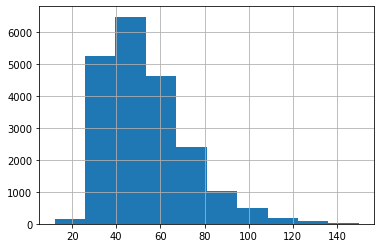

count    20765.000000
mean        53.429890
std         19.199653
min         12.000000
25%         39.000000
50%         49.000000
75%         63.300000
max        150.000000
Name: total_area, dtype: float64

In [44]:
df['total_area'].hist()
plt.show()
df['total_area'].describe()

**Вывод по общей площади:**

*Наибольшие - наименьшие значения соотвественно равны 150 и 12 (в кв.метрах)*

*Наиболее часто встречаемые значения находятся в диапозоне от 40 до 51 (в кв.метрах)*

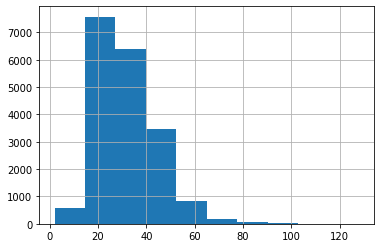

count    19085.000000
mean        30.233182
std         12.973428
min          2.000000
25%         18.000000
50%         29.000000
75%         39.000000
max        128.000000
Name: living_area, dtype: float64

In [45]:
df['living_area'].hist()
plt.show()
df['living_area'].describe()

**Вывод по живой площади:**

*Наибольшие - наименьшие значения приходятся на 128 и 2 (кв. метров)*

*Наиболее часто встречаемые значения находятся в диапозоне от 18 до 30 (кв. метров)*

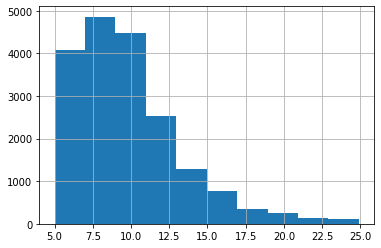

count    18873.000000
mean         9.646892
std          3.470839
min          5.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         24.900000
Name: kitchen_area, dtype: float64

In [46]:
df['kitchen_area'].hist()
plt.show()
df['kitchen_area'].describe()

**Вывод по площади кухни:**

*Наибольшие и наименьшие значения приходятся на 24.9 и 5 метров соотвественно*

*Наиболее часто встречаемые значения находятся в диапозоне с 7 до 9 метров*

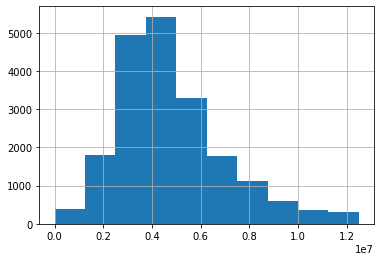

count    2.076500e+04
mean     5.279273e+06
std      3.897968e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.450000e+06
75%      6.100000e+06
max      1.220000e+08
Name: last_price, dtype: float64

In [47]:
df['last_price'].hist(range=(0, 12500000))
plt.show()
df['last_price'].describe()

**Вывод по конечной цене объекта:**

*Поскольку достаточно большое значение у последней цены, то поэтому понимаем, что запись здесь находится в экспозиционной форме*

*Наибольшие и наименьшие значения соотвественно равны  124 000 000 и 430 000 соотвественно*

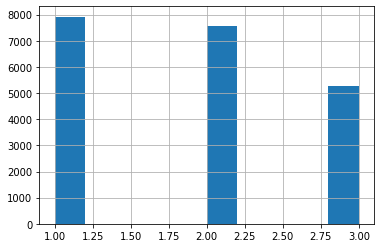

count    20765.000000
mean         1.872478
std          0.786870
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: rooms, dtype: float64

In [48]:
df['rooms'].hist()
plt.show()
df['rooms'].describe()

**Вывод по количеству комнат в квартире:**

*Наибольшие и наименьшие значения равны 3 и 1 соотвественно*

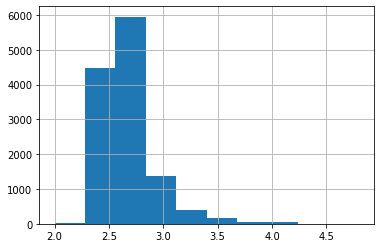

count    12509.000000
mean         2.693878
std          0.235972
min          2.000000
25%          2.500000
50%          2.600000
75%          2.750000
max          4.800000
Name: ceiling_height, dtype: float64

In [49]:
df['ceiling_height'].hist()
plt.show()
df['ceiling_height'].describe()

**Вывод по высоте потолков в квартире:**

*Наибольшие и наименьшие значения соотвественно равны 4.8 и 2*

*Наибольший диапозон лежит в 2.6 и 2.8*

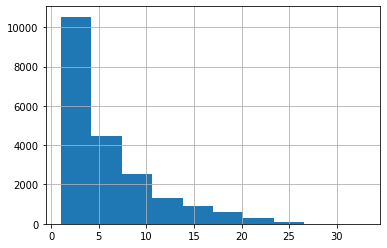

count    20765.000000
mean         5.943703
std          4.913062
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [50]:
df['floor'].hist()
plt.show()
df['floor'].describe()

**Вывод по этажу самой квартиры:**

*Наибольшие и наименьшие значения здесь у 33 и 1 соотвественно*

*Наибоьший диапозон значений приходится на 2 до 4*

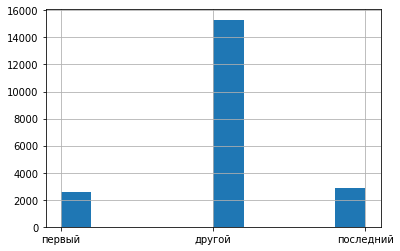

count      20765
unique         3
top       другой
freq       15308
Name: type_floor, dtype: object

In [51]:
df['type_floor'].hist()
plt.show()
df['type_floor'].describe()

**Вывод по типу этажу самой квартиры:**

*Наибольшие значение находится у типа 'другой', - наименьшие у 'первый' и 'последний' соотвественно*

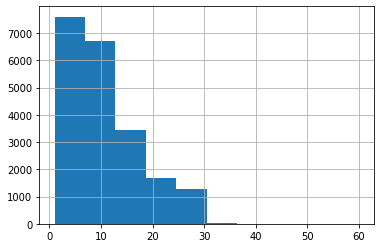

count    20765.000000
mean        10.835685
std          6.630088
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [52]:
df['floors_total'].hist()
plt.show()
df['floors_total'].describe()

**Вывод по общему количеству этажей:**

*Наибольшие и наименьшие значения 60 и 1 соотвественно*

*Наибольший диапозон в пределах от 1 до 5 соотвественно*

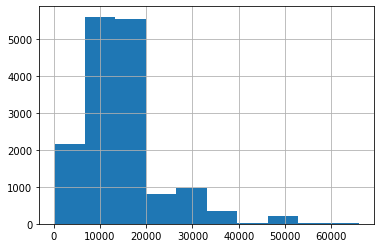

count    15657.000000
mean     14752.573737
std       8487.353023
min        208.000000
25%      10318.000000
50%      13436.000000
75%      16601.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [53]:
df['cityCenters_nearest'].hist()
plt.show()
df['cityCenters_nearest'].describe()

**Вывод по расстоянию до центра города в метрах:**

*Наибольшие и наименьшие значения здесь 65968 и 208 (метрах)*

*Наибольший диапозон в пределах от 7000 до 13 000 (метрах) соотвественно*

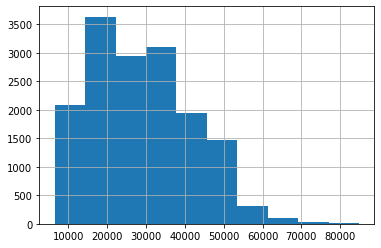

count    15639.000000
mean     29019.258201
std      12904.896251
min       6450.000000
25%      18306.500000
50%      27299.000000
75%      37652.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [54]:
df['airports_nearest'].hist()
plt.show()
df['airports_nearest'].describe()

**Вывод по расстоянию до ближайшего аэропорта в метрах:**

*Наибольшие и наименьшие значения принимают от 84869 и 6450 соотвественно*

*Наибольший диапозон значений лежит в 1500 и 22000*

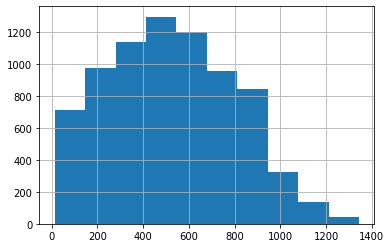

count    7631.000000
mean      525.670554
std       275.961833
min        13.000000
25%       309.000000
50%       509.000000
75%       733.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [55]:
df['ponds_nearest'].hist()
plt.show()
df['ponds_nearest'].describe()

**Вывод по расстоянию до ближайшего парка:**

*Наибольшие и наименьшие значения соотвественно равны: 1344 и 13*

*Наибольший диапозон значений лежит в 415 до 545*

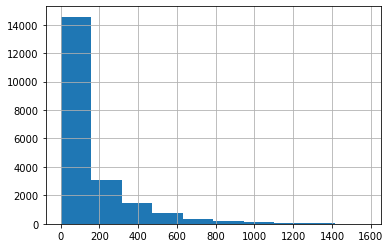

count    20765.000000
mean       164.179051
std        200.727265
min          1.000000
25%         45.000000
50%         95.000000
75%        192.000000
max       1572.000000
Name: days_exposition, dtype: float64

In [56]:
df['days_exposition'].hist()
plt.show()
df['days_exposition'].describe()

In [57]:
print('Медиана для количества дней каждого объявления составляет:',df['days_exposition'].median())
print('Среднее значение для количества дней каждого объявления составляет:',df['days_exposition'].mean())

Медиана для количества дней каждого объявления составляет: 95.0
Среднее значение для количества дней каждого объявления составляет: 164.17905128822537


**Вывод:**

*Исходя из приведенного выше анализа, можно сделать вывод о том, что обычно продажа занимает в районе 95 дней (чуть более-менее 3 месяцев).Следует понимать, что продажи можно считать быстрыми, которые явно меньше медианы (2 квартиля). Необычно долгими считаются продажи которые проходят 5 лет. Возможно это связано с инцидентом, который мог пройзойти дома, либо же это обусловлено иными сильно отличающегося от обычных показателей - к примеру очень высокая цена данной квартиры*

In [58]:
df.pivot_table(index='total_area', values='last_price', aggfunc='mean')

,last_price
total_area,
12.0,2400000.0
13.0,2350000.0
13.2,1686000.0
15.0,1725000.0
17.2,2050000.0
...,...
146.5,12900000.0
146.8,12160000.0
147.0,9800000.0


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

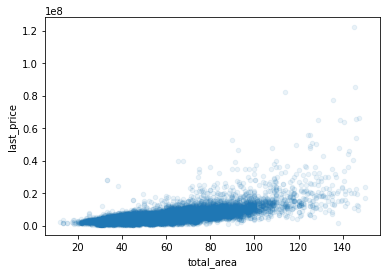

In [59]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.09) 

In [60]:
print(df['total_area'].corr(df['last_price']))

0.6764612536600828


In [61]:
df.pivot_table(index='living_area', values='last_price', aggfunc='mean')

,last_price
living_area,
2.0,6350000.0
3.0,34715000.0
6.0,3799000.0
6.5,4050000.0
8.0,4800000.0
...,...
97.0,37000000.0
99.3,17000000.0
99.5,7200000.0


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

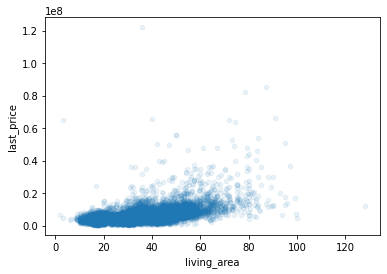

In [62]:
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.09) 

In [63]:
print(df['living_area'].corr(df['last_price']))

0.5463394711044197


In [64]:
df.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean')

,last_price
kitchen_area,
5.00,3.610414e+06
5.02,1.350000e+07
5.04,3.900000e+06
5.06,3.400000e+06
5.10,4.084242e+06
...,...
24.60,1.170000e+07
24.70,1.458333e+07
24.80,1.078800e+07


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

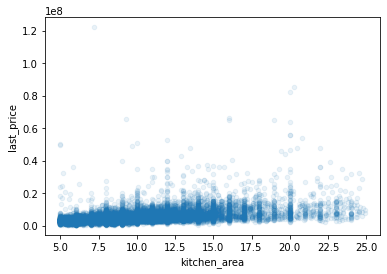

In [65]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.09) 

*Так как мы хотим численно оценить взаимосвязь то следует применить коэффициента корреляции пирсона*

In [66]:
print(df['kitchen_area'].corr(df['last_price']))

0.4651134018589517


*Видим, что значение приближается к 0.5 - что говорит нам о том, что коэффициент корреляции Пирсона — положительный, и потому  рост одной величины, связан с ростом у другой (второй)*

In [67]:
df.pivot_table(index='rooms', values='last_price', aggfunc='mean') 

,last_price
rooms,
1,3.806982e+06
2,5.369542e+06
3,7.361314e+06


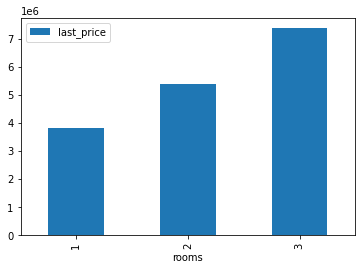

In [68]:
# df.plot(x='rooms', y='last_price', kind='scatter')
df.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot.bar()
plt.show()

In [69]:
df.pivot_table(index='type_floor', values='last_price', aggfunc='mean') 

,last_price
type_floor,
другой,5.546752e+06
первый,4.206427e+06
последний,4.817311e+06


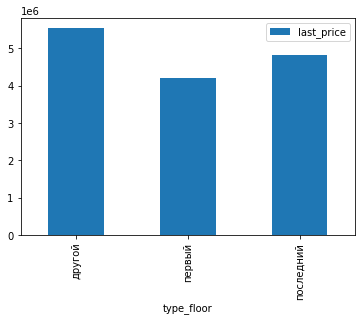

In [70]:
# df.plot(x='type_floor', y='last_price', kind='scatter') 
#v = df.pivot_table(index='type_floor', values='last_price', aggfunc='mean') 
df.pivot_table(index='type_floor', values='last_price', aggfunc='mean').plot.bar()
plt.show()

In [71]:
df.pivot_table(index='day_week_publication', values='last_price', aggfunc='mean') 

,last_price
day_week_publication,
0,5.272999e+06
1,5.361519e+06
2,5.293094e+06
3,5.376623e+06
4,5.198890e+06
5,5.162903e+06
6,5.135271e+06


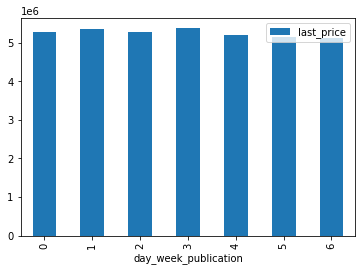

In [72]:
# df.plot(x='day_week_publication', y='last_price', kind='scatter') 
df.pivot_table(index='day_week_publication', values='last_price', aggfunc='mean').plot.bar()
plt.show()

In [73]:
df.pivot_table(index='month_publication', values='last_price', aggfunc='mean')

,last_price
month_publication,
1,5.357226e+06
2,5.181449e+06
3,5.225414e+06
4,5.374149e+06
5,5.108058e+06
6,5.187300e+06
7,5.237364e+06
8,5.523870e+06
9,5.318719e+06


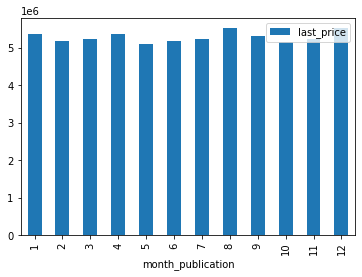

In [74]:
# df.plot(x='month_publication', y='last_price', kind='scatter') 
df.pivot_table(index='month_publication', values='last_price', aggfunc='mean').plot.bar()
plt.show()

In [75]:
df.pivot_table(index='year_publication', values='last_price', aggfunc='mean') 

,last_price
year_publication,
2014,8.946356e+06
2015,6.014123e+06
2016,5.299655e+06
2017,5.165336e+06
2018,5.131789e+06
2019,5.597921e+06


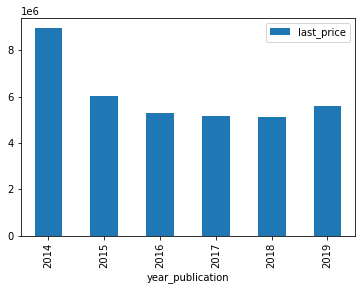

In [76]:
# df.plot(x='year_publication', y='last_price', kind='scatter') 
df.pivot_table(index='year_publication', values='last_price', aggfunc='mean').plot.bar()
plt.show()

**Выводы по факторам большего влияния на общую (полную) стоимость объекта:**

*Исходя из исследовательского анализа данных - выявили то, что есть зависимость от соттвествующих параметров: общей площади; жилой площади;площади кухни;количества комнат; этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год) - от цены, поскольку в графическом представление наблюдалось то, что есть легкая восходящая тенденция у данных (смещение от изначального к более вышем)*

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name**

In [77]:
print(df.groupby('locality_name')['days_exposition'].count().sort_values(ascending=False).head(10))

locality_name
Санкт-Петербург      13402
посёлок Мурино         507
посёлок Шушары         414
Всеволожск             363
Пушкин                 326
посёлок Парголово      320
Колпино                303
Гатчина                284
деревня Кудрово        275
Выборг                 213
Name: days_exposition, dtype: int64


In [78]:
print(df.loc[df['locality_name'] == 'Санкт-Петербург']['price_one_square'].mean())
print(df.loc[df['locality_name'] == 'посёлок Мурино']['price_one_square'].mean())
print(df.loc[df['locality_name'] == 'посёлок Шушары']['price_one_square'].mean())
print(df.loc[df['locality_name'] == 'Всеволожск']['price_one_square'].mean())
print(df.loc[df['locality_name'] == 'Пушкин']['price_one_square'].mean())
print(df.loc[df['locality_name'] == 'Колпино']['price_one_square'].mean())
print(df.loc[df['locality_name'] == 'посёлок Парголово']['price_one_square'].mean())
print(df.loc[df['locality_name'] == 'Гатчина']['price_one_square'].mean())
print(df.loc[df['locality_name'] == 'деревня Кудрово']['price_one_square'].mean())
print(df.loc[df['locality_name'] == 'Выборг']['price_one_square'].mean())

111422.37099252034
85097.5009947861
78548.66998317164
68799.43389821278
102099.7567576284
75919.41967801396
90613.49580663376
68450.68162712015
92750.46727273255
58384.01566445875


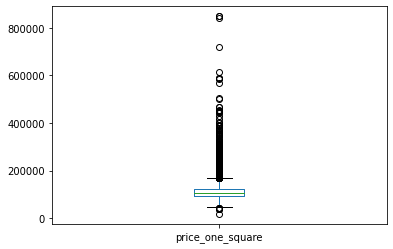

In [79]:
df.loc[df['locality_name'] == 'Санкт-Петербург']['price_one_square'].plot(kind="box")
plt.show()

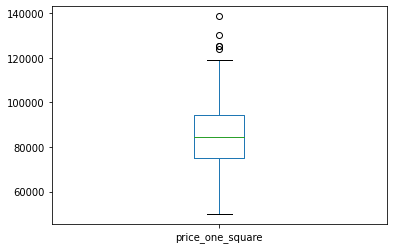

In [80]:
df.loc[df['locality_name'] == 'посёлок Мурино' ]['price_one_square'].plot(kind="box")
plt.show()

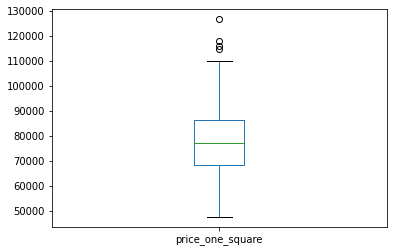

In [81]:
df.loc[df['locality_name'] == 'посёлок Шушары']['price_one_square'].plot(kind="box")
plt.show()

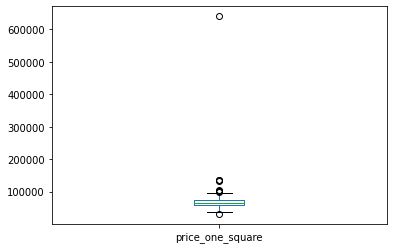

In [82]:
df.loc[df['locality_name'] == 'Всеволожск']['price_one_square'].plot(kind="box")
plt.show()

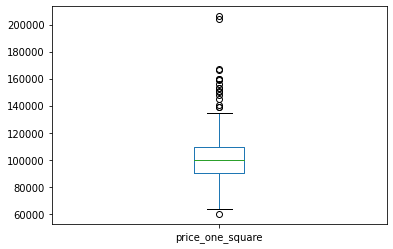

In [83]:
df.loc[df['locality_name'] == 'Пушкин']['price_one_square'].plot(kind="box")
plt.show()

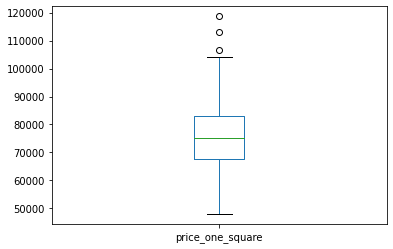

In [84]:
df.loc[df['locality_name'] == 'Колпино']['price_one_square'].plot(kind="box")
plt.show()

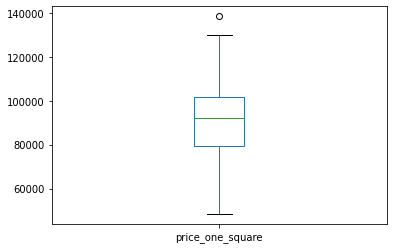

In [85]:
df.loc[df['locality_name'] == 'посёлок Парголово']['price_one_square'].plot(kind="box")
plt.show()

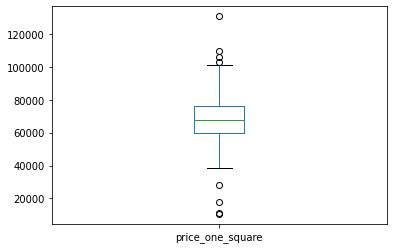

In [86]:
df.loc[df['locality_name'] == 'Гатчина']['price_one_square'].plot(kind="box")
plt.show()

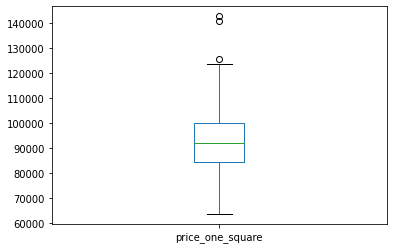

In [87]:
df.loc[df['locality_name'] ==  'деревня Кудрово']['price_one_square'].plot(kind="box")
plt.show()

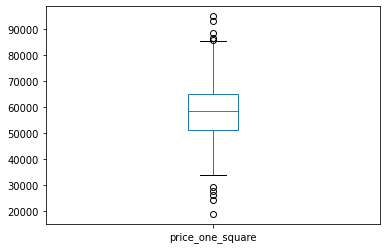

In [88]:
df.loc[df['locality_name'] == 'Выборг']['price_one_square'].plot(kind="box")
plt.show()

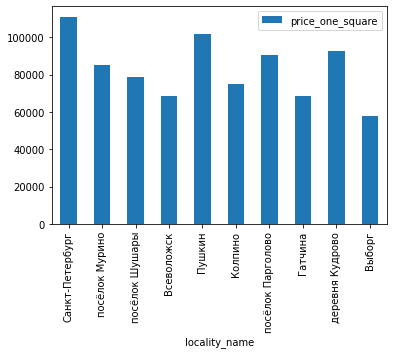

In [89]:
d = {'locality_name': ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'], 
     'price_one_square': [110990.13169642058, 84962.56803863902, 78513.13920959676, 68512.79625123029, 101866.74125620359, 75237.5455126228, 90448.42380591163,  68622.35671362601, 92750.46727273255, 58092.49722907467]}
data_frame = pd.DataFrame(data=d)
data_frame.plot(x='locality_name', y='price_one_square', kind='bar')
plt.show()

**Пункты с самой высокой стоимостью квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**: *'Санкт-Петербург'; 'Пушкин'; 'деревня Кудрово'; 'посёлок Парголово'; 'посёлок Мурино'*

**Пункты с самой низкой стоимостью квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.:** *'посёлок Шушары'; 'Колпино'; 'Гатчина'; 'Всеволожск'; 'Выборг';*

**Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.**

In [90]:
v = df.query('locality_name == "Санкт-Петербург"')
v.pivot_table(index='center_km',values='price_one_square',aggfunc='mean')

,price_one_square
center_km,
0.208,172619.047619
0.215,109900.000000
0.287,88796.296296
0.291,101321.585903
0.318,413216.389110
...,...
28.644,85191.334598
28.806,79890.310786
29.263,56526.806527


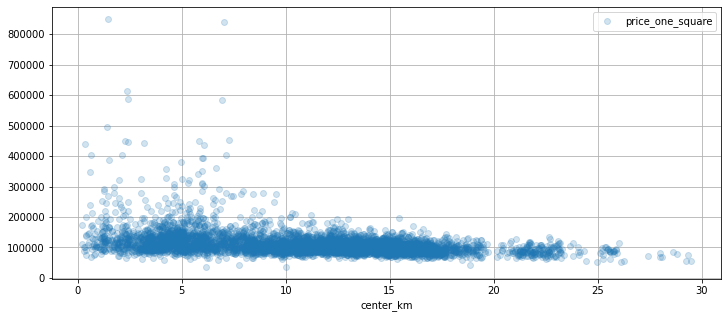

In [91]:
# v.pivot_table(index='center_km',values='price_one_square',aggfunc='mean').hist(range=(0, 200000))
# plt.show()
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='price_one_square', aggfunc='median').plot(grid=True, style='o', figsize=(12, 5), alpha=0.2)
plt.show()

**Итог:**

*Cтоимость объектов зависит от расстояния до центра города - чем ближе, тем цена больше. Можно увидить, как разнятся данные,и чем меньше до центра города, тем более высока средняя цена. Что вполне соотвествует реальной картине мира и потому расчет верен.*

# Общий вывод

# Наша задача в данном иследовательском проекте состоялось в том, чтобы выполнить предобработку данных и изучить их, тем самым найдя интересные особенности и зависимости, которые существуют на рынке недвижимости.

*Первое, что следовало бы сделать - это оценить потери, которые мы имеем.*

* Нам известно о том, что данные были получены с помощью:
     * 1. Добавленния пользователем; 
     * 2. Картографическим способом получения;
     
*Что говорит и сведетельствует нам о том, что возможными причинами появления пропусков является человеческий фактор и ошибка системы при считывании данных.*

* Потому нам следовало заполнить пропуски двумя способами: 
    *  1. Произвести замену на '0'; 
    *  2. Произвести замену пропусков медианным значением; 
   
*Замена производится по обоим способам с помощью метода fillna*

* Столбцы, которые мы выбрали для соотвествующей замены 1 способа: 
    * 1. 'balcony';
    * 2. 'parks_around3000'; 
    * 3. 'ponds_around3000'; 
    
*Это связано с тем, что раз пропуски находятся в данных столбцах, то это говорит о том, что скорее всего там отсутсвие значения.*

* Столбцы, которые мы выбрали для соотвествующей замены 2 способа: 
    * 1. 'floors_total;
    * 2. 'days_exposition'; 

*Замена пропусков была необходима по той причине, что был указан не корретный тип данных, и эти столбцы нам важны для иследования, и потому пропуски было необходимо устранить, чтобы в дальнейшем присвоить им новый тип с помощью метода: astype*

*После нам необходимо было избавится от аномалий и неявных дубликатов*

*Неявные дубликаты были обнаружены в столбце 'locality_name', где ошибка связана с тем, что имеется верная запись в двух вариациях: 'поселок' и 'посёлок'. Потому создали отдельно функцию и с помощью метода apply успешно применили нужное преобразование - но перед этим мы избавились от пропущенных значений заменив их на 'unknown'*

* Аномалии мы обнаружили в соотвествующих столбцах:
    * 1. 'rooms';
    * 2. 'kitchen_area';
    * 3. 'balcony'; 
    * 4. 'celing_height';
    * 5. 'total_area'; 
    * 6. 'airport_nearest'; 
    
*Применив к столбцам метод unique() и увидев уникальные значения, которые явно по своей природе там не могли быть, - мы отбросили ту часть выбросов, которая не превышает 10%*

*Также по ходу исследования мы добавили новые столбцы, такие как стоимость 1 квадратного метра, день, месяц, год объявления и тип объявления*


**В ходе иследования мы проверили исследовательский анализ факторов и признаков, которое отражаются следующим образом:**

*Вывод по общей площади:*

   * Наибольшие - наименьшие значения соотвественно равны 150 и 12 (в кв.метрах)

   * Наиболее часто встречаемые значения находятся в диапозоне от 40 до 51 (в кв.метрах)



*Вывод по живой площади:*

   * Наибольшие - наименьшие значения приходятся на 128 и 2 (кв. метров)

   * Наиболее часто встречаемые значения находятся в диапозоне от 18 до 30 (кв. метров)


*Вывод по площади кухни:*

   * Наибольшие и наименьшие значения приходятся на 24.9 и 5 метров соотвественно

   * Наиболее часто встречаемые значения находятся в диапозоне с 7 до 9 метров



*Вывод по конечной цене объекта:*

   * Поскольку достаточно большое значение у последней цены, то поэтому понимаем, что запись здесь находится в экспозиционной форме

   * Наибольшие и наименьшие значения соотвественно равны 124 000 000 и 430 000 соотвественно



*Вывод по количеству комнат в квартире:*

   * Наибольшие и наименьшие значения равны 3 и 1 соотвественно


*Вывод по высоте потолков в квартире:*

   * Наибольшие и наименьшие значения соотвественно равны 4.8 и 2

   * Наибольший диапозон лежит в 2.6 и 2.8



*Вывод по этажу самой квартиры:*

   * Наибольшие и наименьшие значения здесь у 33 и 1 соотвественно

   * Наибоьший диапозон значений приходится на 2 до 4



*Вывод по типу этажу самой квартиры:*

   * Наибольшие значение находится у типа 'другой', - наименьшие у 'первый' и 'последний' соотвественно



*Вывод по общему количеству этажей:*

   * Наибольшие и наименьшие значения 60 и 1 соотвественно
 
   * Наибольший диапозон в пределах от 1 до 5 соотвественно


*Вывод по расстоянию до центра города в метрах:*

   * Наибольшие и наименьшие значения здесь 65968 и 208 (метрах)

   * Наибольший диапозон в пределах от 7000 до 13 000 (метрах) соотвественно


*Вывод по расстоянию до ближайшего аэропорта в метрах:*

   * Наибольшие и наименьшие значения принимают от 84869 и 6450 соотвественно

   * Наибольший диапозон значений лежит в 1500 и 22000


*Вывод по расстоянию до ближайшего парка:*

   * Наибольшие и наименьшие значения соотвественно равны: 1344 и 13

   * Наибольший диапозон значений лежит в 415 до 545


*Также по ходу иследования мы выявили как проходит процесс продаж в днях обычно и какие именно продажи достаточно долгие* 

| Обычное время продажи (в днях)| Достаточное долгое время продажи (в днях)| 
| ----------------------------- | ---------------------------------------- | 
|            95                 |                   1500                   |    

*После мы определяли: какие факторы больше всего влияют на общую (полную) стоимость объекта. Анализ проводился для количественных и категориальных данных*

|  Фактор влияния | Коэффициент корреляции |
| --------------- | ---------------------- | 
| Общая площадь   | 0.6764612536600828     |     
| Живая площадь   | 0.5463394711044197     |     
| Площадь кухни   | 0.4651134018589517     | 

*Тем самым видим, что **самым сильным фактором считается "Общая площадь"**, поскольку его значение наиболее приближенно к 1*


Далее определяем факторы на влияние конечной цены:

|Количество комнат| Конечная цена|
| --------------- | ------------ | 
|       1         | 3 806 982    |     
|       2         | 5 369 542    |     
|       3         | 7 361 314    |     

* Выявили, что **количество комнат влияет на конечную стоимость квартиры**

|  Тип квартиры   | Конечная цена |
| --------------- | ------------- | 
|     другой      | 5 546 752     |     
|     первый      | 4 206 427     |     
|    последний    | 4 817 311     |     

* Также определили, что конечаня цена наибольшая у квартиры с типом 'другой', **влияние типа квартиры на цену - присутсвует**

|Год публикации   | Конечная цена|
| --------------- | ------------ | 
|    2014         | 8 946 356    |     
|    2015         | 6 014 123    |     
|    2016         | 5 299 655    |    
|    2017         | 5 165 336    |
|    2018         | 5 131 789    |    
|    2019	      | 5 597 921    |   

* Наибольший год, который мог быть у квартиры: 2014 - тем самым определили то, что **конечная стоимость зависит от года**

Чтобы понять, какая квартира могла быть потенциально самой дорогой мы могли поставить влияющие на стоимость параметры, которые мы по ходу работы выявили, например:

| Общая площадь | Жилая площадь | Площадь кухни | Количество комнат | Этаж квартиры | Год размещения |
| ------------- | ------------- | ------------- | ----------------- | ------------- | -------------- |
|     150       |      128      |      24.9     |         5         |    другой     |       2014     |

 
По ходу дальнейшего исследования определили стоимость квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и их стоимость квадратного метра:

| Название пункта | Количество объявлений |  Стоимость квадратного метра  | 
| -------------   | --------------------  | ----------------------------- | 
| Санкт-Петербург |      13402            |       111422.37099252034      |       
|     Пушкин      |      507              |        85097.5009947861       |
| деревня Кудрово |      414              |        78548.66998317164      |
|посёлок Парголово|      363              |        68799.43389821278      |    
| посёлок Мурино  |      326              |       102099.7567576284       |   
| посёлок Шушары  |      320              |        75919.41967801396      |   
|    Колпино      |      303              |        90613.49580663376      |   
|    Гатчина      |      284              |        68450.68162712015      |   
|   Всеволожск    |      275              |        92750.46727273255      |   
|     Выборг      |      213              |        58384.01566445875      |   

И выяснили также, - что **стоимость объектов зависит от расстояния до центра города** - чем ближе, тем цена больше. (Если рассматривается Санкт-Петербург)